In [2]:
#Rafael Leinio Pereira 103238
import cv2
import matplotlib.pyplot as plt
import numpy as np
from copy import copy, deepcopy
lena = cv2.resize(cv2.imread("lena.jpg",0),(536,536))

In [3]:
big_lena = np.zeros((lena.shape[0]*2,lena.shape[1]*2),dtype=int)

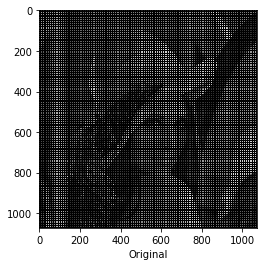

[[163   0 162 ...   0 128   0]
 [  0   0   0 ...   0   0   0]
 [163   0 162 ...   0 128   0]
 ...
 [  0   0   0 ...   0   0   0]
 [ 44   0  44 ...   0 108   0]
 [  0   0   0 ...   0   0   0]]


In [4]:
for l in range(lena.shape[0]):
    for c in range(lena.shape[1]):
            big_lena[l*2][c*2] = lena[l][c]

plt.figure()
plt.imshow(big_lena,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Original")
plt.show()
cv2.imwrite('big_lena1.jpg',big_lena)
print(big_lena)

[[163 162 162 ... 141 128 128]
 [162 162 162 ... 141 128 128]
 [163 162 162 ... 141 128 128]
 ...
 [ 44  44  44 ... 106 108 108]
 [ 44  44  44 ... 106 108 108]
 [ 44  44  44 ... 106 108 108]]


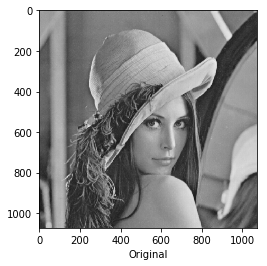

True

In [15]:
#convolução (1x3) colunas
for l in range(big_lena.shape[0]):
    for c in range(1,big_lena.shape[1] - (lena.shape[1] % 3),2): #andando pelos números impares, parando até o último múltiplo de 3
            big_lena[l][c] = big_lena[l][c-1]/2 + big_lena[l][c+1]/2
            
#convolução (1x3) linha
for c in range(big_lena.shape[1]):
    for l in range(1,big_lena.shape[0] - (lena.shape[0] % 3),2): #andando pelos números impares, parando até o último múltiplo de 3
            big_lena[l][c] = big_lena[l-1][c]/2 + big_lena[l+1][c]/2

#pixel de coluna e linha impar recebe a média da vizinhança 6
for l in range(1,big_lena.shape[0] - (lena.shape[0] % 3),3):
    for c in range(1,big_lena.shape[1] - (lena.shape[1] % 3),3):
        avg = big_lena[l][c-1] + big_lena[l][c+1] + big_lena[l+1][c] + big_lena[l-1][c] + big_lena[l-1][c -1] + big_lena[l-1][c + 1] + big_lena[l+1][c-1]+ big_lena[l+1][c +1]
        avg = avg//8
        big_lena[l][c] = avg

#arrumando bordas
if big_lena.shape[1] % 3 == 1:#última célula esta sem informação e a anterior tem um pixel original
    for l in range(big_lena.shape[0]):
        big_lena[l][big_lena.shape[1]-1] = big_lena[l][big_lena.shape[1]-2]
if big_lena.shape[0] % 3 == 1:#última célula esta sem informação e a anterior tem um pixel original
    for c in range(big_lena.shape[1]):
        big_lena[big_lena.shape[0]-1][c] = big_lena[big_lena.shape[1]-2][c]

print(big_lena)
plt.figure()
plt.imshow(big_lena,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Original")
plt.show()
cv2.imwrite('big_lena2.jpg',big_lena)

1